# Data 620 Web Analytics
Week 6 - Tony Mai and Lin Li

Analyze a simple 2-node network: the attendance of 18 Southern Women at 14 social events
1. What can you infer about the relationships between (1) the women, and (2) the social events?  

2. Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

The following script was downloaded from https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html, demonstrating how to make unipartite projections.


In [1]:
%matplotlib inline


# Davis Club


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import networkx.algorithms.bipartite as bipartite
from networkx.algorithms import community #This is part of networkx, for community detection
import pandas as pd

In [3]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

### Network components and connectivity

In [4]:
# If your Graph has more than one component, this will return False
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

True
Network diameter of largest component: 4


We see that our network graph does have more than one component and the network diameter of the largest component is 4. Diameter is the length between two nodes that is the furthest apart. Diameter also gives us a general picture of the network size.   

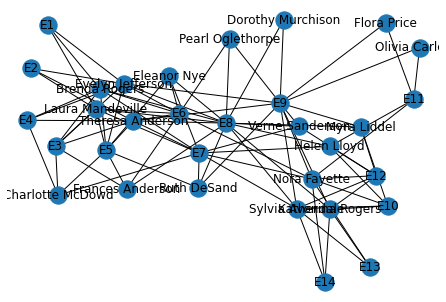

In [5]:
# graph network with node labels
nx.draw(G, with_labels = True)
plt.show()

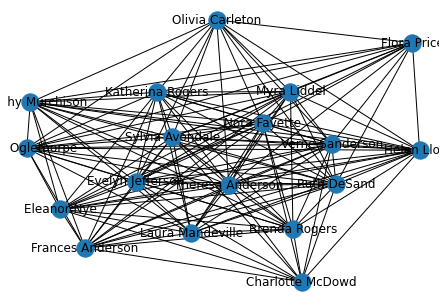

In [6]:
# visualize the projected unipartite network
nx.draw(W, with_labels = True)
plt.show()

In [7]:
# graph info for bipartite network
print(nx.info(G))

# graph info for projected unipartite network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


Analyzing 2-mode networks can be challenging. There are a number of suggested options that can be used to analyze a two-mode network, here we explore
    1. analyze as one-mode network
    2. convert it into one-mode network and analyze as usual

Density is the ratio of actual edges in the network to all possible edges in the network, showing how closely knit the network is.

In [8]:
density = nx.density(G)
print("Density for bipartite network as one-mode:", density)

density = nx.density(W)
print("Density for projected unipartite:", density)


Density for bipartite network as one-mode: 0.17943548387096775
Density for projected unipartite: 0.9084967320261438


We use centrality measures to identify the most important nodes in the networks. In the 2-mode network, we expect a combination of the participants and the events with the most links.

In [9]:
#calculate degree centrality
degree_centrality_two_mode = nx.degree_centrality(G)
degree_centrality_projected = nx.degree_centrality(W)

# sort values
sorted_centrality_two_mode = sorted(degree_centrality_two_mode.items(), key=itemgetter(1), reverse=True)
sorted_degree_centrality_projected = sorted(degree_centrality_projected.items(), key=itemgetter(1), reverse=True)

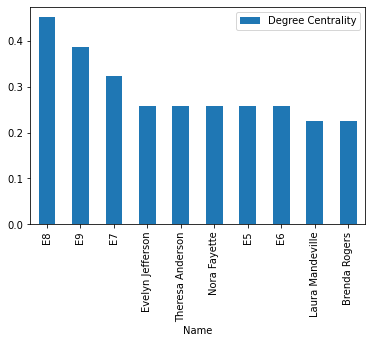

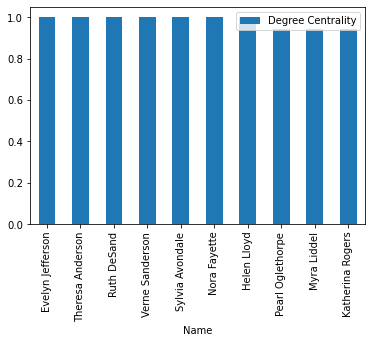

In [10]:
# visualize centrality measures for the two types of analysis
top_degree_centrality_G = sorted_centrality_two_mode [:10]
df_centrality_G = pd.DataFrame(top_degree_centrality_G, columns =['Name', 'Degree Centrality']) 
chart_G = df_centrality_G.plot.bar(x='Name', y='Degree Centrality', rot=90)
  
top_degree_centrality_W = sorted_degree_centrality_projected [:10]
df_centrality_W = pd.DataFrame(top_degree_centrality_W, columns =['Name', 'Degree Centrality']) 
chart_W = df_centrality_W.plot.bar(x='Name', y='Degree Centrality', rot=90)

We see that E8 has the highest centrality. And that 'Evelyn Jefferson', 'Theresa Anderson', and 'Nora Fayette' have been identified as the most central people in both types of analysis.


Betweenness centrality looks at all the shortest paths that pass through a particular node by calculating every possible shortest path in your network. It identifies important nodes not because they have a lot of connections but because they stand in between groups, giving the network connectivity and cohesion

In [11]:
betweenness_dict_W = nx.betweenness_centrality(W) 
betweenness_dict_G = nx.betweenness_centrality(G) # Run betweenness centrality

eigenvector_dict_G = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict_G, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict_G, 'eigenvector')



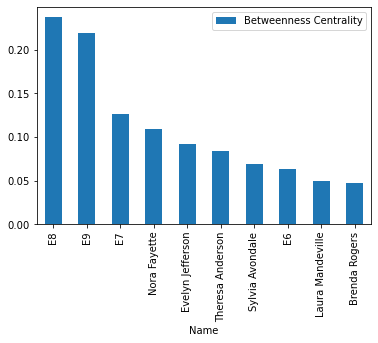

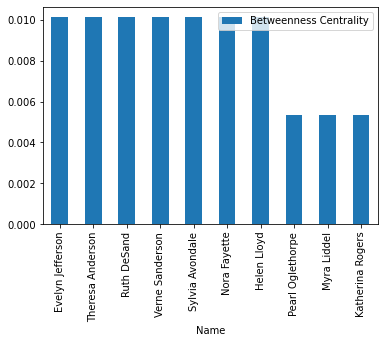

In [12]:

sorted_betweenness_G = sorted(betweenness_dict_G.items(), key=itemgetter(1), reverse=True)
top_degree_btw_G = sorted_betweenness_G [:10]
df_btw_G = pd.DataFrame(top_degree_btw_G, columns =['Name', 'Betweenness Centrality']) 
chart_btw_G = df_btw_G.plot.bar(x='Name', y='Betweenness Centrality', rot=90)

sorted_betweenness_W = sorted(betweenness_dict_W.items(), key=itemgetter(1), reverse=True)
top_degree_btw_W = sorted_betweenness_W [:10]
df_btw_W = pd.DataFrame(top_degree_btw_W, columns =['Name', 'Betweenness Centrality']) 
chart_btw_W = df_btw_W.plot.bar(x='Name', y='Betweenness Centrality', rot=90)

We notice that most of the nodes that have high degree of centrality also have high betweenness centrality, but that might not be always the case.
We see that social event E8 have both high degree of centrality and betweenness centrality. This can also be seen in Nora Fayette, Evelyn Jefferson, and Theresia Anderson. However, Nora Fayette has a higher betweenness than Theresa Anderson. This shows us that knowing more people isn't everything.

In [13]:
#First get the top 10 nodes by betweenness as a list
top_betweenness = sorted_betweenness_G[:10]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_centrality_two_mode[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: E8 | Betweenness Centrality: 0.23700300426238308 | Degree: 0.45161290322580644
Name: E9 | Betweenness Centrality: 0.21920891071174742 | Degree: 0.3870967741935484
Name: E7 | Betweenness Centrality: 0.1258812653738273 | Degree: 0.3225806451612903
Name: Nora Fayette | Betweenness Centrality: 0.10858130346049079 | Degree: 0.25806451612903225
Name: Evelyn Jefferson | Betweenness Centrality: 0.09243053952845212 | Degree: 0.25806451612903225
Name: Theresa Anderson | Betweenness Centrality: 0.08382717212549207 | Degree: 0.25806451612903225
Name: Sylvia Avondale | Betweenness Centrality: 0.06862488078028632 | Degree: 0.22580645161290322
Name: E6 | Betweenness Centrality: 0.06319868906402719 | Degree: 0.25806451612903225
Name: Laura Mandeville | Betweenness Centrality: 0.04914868366576943 | Degree: 0.22580645161290322
Name: Brenda Rogers | Betweenness Centrality: 0.04735814390994237 | Degree: 0.22580645161290322


Community detection with modularity

Modularity is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. Modularity gives you an overall score of how fractious your network is, and that score can be used to partition the network and return the individual communities.

In [14]:
communities = community.greedy_modularity_communities(G)

The method greedy_modularity_communities() tries to determine the number of communities appropriate for the graph, and groups all nodes into subsets based on these communities. Instead of creating a dictionary like the other centrality functions, it creates a list of special “frozenset” objects which is similar to lists. There’s one set for each group, and the sets contain the names of the people in each group. To add this information to your network, we must first create a dictionary that labels each person with a number value for the group to which they belong.

In [15]:
modularity_dict = {}
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# add modularity information 
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [16]:
# modularity_dict

In [17]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: E9 | Eigenvector Centrality: 0.2683424242623056
Name: Sylvia Avondale | Eigenvector Centrality: 0.1959916512474238
Name: Nora Fayette | Eigenvector Centrality: 0.18660813789991867
Name: Katherina Rogers | Eigenvector Centrality: 0.1557690878247752
Name: E12 | Eigenvector Centrality: 0.1433982299008923


In [18]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Olivia Carleton', 'E11', 'E13', 'E10', 'Myra Liddel', 'Nora Fayette', 'Katherina Rogers', 'E14', 'E9', 'E12', 'Sylvia Avondale', 'Helen Lloyd', 'Flora Price']
Class 1: ['Brenda Rogers', 'E5', 'E6', 'Charlotte McDowd', 'E1', 'Evelyn Jefferson', 'Laura Mandeville', 'Frances Anderson', 'E2', 'E3', 'Theresa Anderson', 'E4']
Class 2: ['E7', 'E8', 'Verne Sanderson', 'Pearl Oglethorpe', 'Eleanor Nye', 'Dorothy Murchison', 'Ruth DeSand']


In [19]:
nx.write_gexf(G, 'Davis_Club.gexf')

## Conclusion

This network have relatively low density of 0.17943548387096775. 
We know the top three women Nora Fayette, Evelyn Jefferson, and Theresia Anderson are found in the most social events of 8. We know the top three social events E7, E8, E9 have the highest betweenness centrality and high degree of centrality showing that these events host most of the important women of the network. 

We believe Nora Fayette, Evelyn Jefferson, and Theresia Anderson attends most of the social clubs(8) and have the most connections to other groups(social events and other women via social events). The three social events E7, E8, E9 hosts most of the influential women in our network.

## Reference

http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
